In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import InceptionResNetV2,ResNet152V2,VGG16,VGG19,ResNet50, MobileNetV2,InceptionV3

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D, Dropout

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Below Is the code to plot he final training and validation metrics


In [ ]:
pip install tensorflow

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json

from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import InceptionResNetV2,ResNet152V2,VGG16,VGG19,ResNet50,MobileNetV2,EfficientNetB2,Xception,NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D, Dropout



In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.1,
)

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.1)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )



In [14]:
train_dataset  = train_datagen.flow_from_directory(directory = '/kaggle/input/co-ferg-db/FERG_DB_WITH_TEST/train',
                                                   target_size = (92,92),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 32)

Found 29094 images belonging to 7 classes.


In [6]:
import os
import matplotlib.pyplot as plt

def plot_class_histogram(folder_path):
    class_counts = {}
    # Define a list of distinct colors for the bars
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    # Iterate through the folders (classes) in the provided path
    for idx, class_name in enumerate(os.listdir(folder_path)):
        class_dir = os.path.join(folder_path, class_name)
        
        # Count the number of images in the class folder
        if os.path.isdir(class_dir):
            image_count = len(os.listdir(class_dir))
            class_counts[class_name] = image_count

            # Select a distinct color from the list
            color = colors[idx % len(colors)]

            # Plot the class count with the selected color
            plt.bar(class_name, image_count, color=color)
    
    # Plot the histogram
    
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Histogram of Images per Class')
    plt.xticks(rotation=45)

    plt.show()

# Provide the path to the folder containing class subfolders
folder_path = '/kaggle/input/d/hemanshshridhar/ferg-db/FERG_DB_256'
plot_class_histogram(folder_path)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/d/hemanshshridhar/ferg-db/FERG_DB_256'

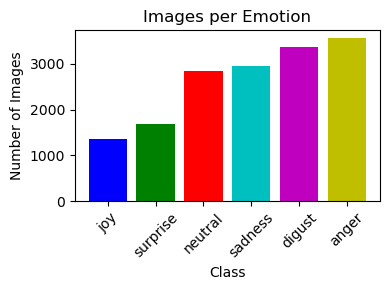

In [50]:
import os
import matplotlib.pyplot as plt

def plot_class_histogram(folder_path, plot_width, plot_height):
    class_counts = {}
    # Define a list of distinct colors for the bars
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    # Create a figure with the specified size
    plt.figure(figsize=(plot_width, plot_height))

    # Iterate through the folders (classes) in the provided path
    for idx, class_name in enumerate(os.listdir(folder_path)):
        class_dir = os.path.join(folder_path, class_name)
        
        # Count the number of images in the class folder
        if os.path.isdir(class_dir):
            image_count = len(os.listdir(class_dir))
            class_counts[class_name] = image_count

            # Select a distinct color from the list
            color = colors[idx % len(colors)]

            # Plot the class count with the selected color
            plt.bar(class_name, image_count, color=color)
    
    # Plot the histogram with the specified size
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('FERG-Database')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Provide the path to the folder containing class subfolders
folder_path = '/kaggle/input/d/hemanshshridhar/ferg-db/FERG_DB_256'
# Specify the desired plot width and height
plot_width = 4 # Adjust this value as needed
plot_height = 3  # Adjust this value as needed

plot_class_histogram(folder_path, plot_width, plot_height)


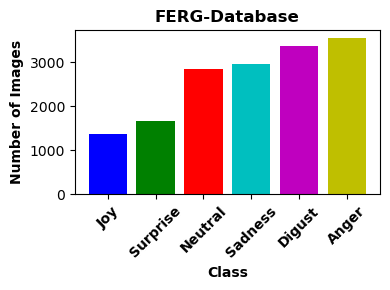

In [51]:
import os
import matplotlib.pyplot as plt

def plot_class_histogram(folder_path, plot_width, plot_height):
    class_counts = {}
    # Define a list of distinct colors for the bars
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    # Create a figure with the specified size
    plt.figure(figsize=(plot_width, plot_height))

    # Iterate through the folders (classes) in the provided path
    for idx, class_name in enumerate(os.listdir(folder_path)):
        class_dir = os.path.join(folder_path, class_name)

        # Count the number of images in the class folder
        if os.path.isdir(class_dir):
            image_count = len(os.listdir(class_dir))
            class_counts[class_name] = image_count

            # Select a distinct color from the list
            color = colors[idx % len(colors)]

            # Capitalize the first letter of the class name
            class_name_display = class_name.capitalize()

            # Plot the class count with the selected color
            plt.bar(class_name_display, image_count, color=color)

    # Plot the histogram with the specified size
    plt.xlabel('Class', fontweight='bold')
    plt.ylabel('Number of Images', fontweight='bold')
    plt.title('FERG-Database', fontweight='bold')
    plt.xticks(rotation=45, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Provide the path to the folder containing class subfolders
folder_path = '/kaggle/input/d/hemanshshridhar/ferg-db/FERG_DB_256'
# Specify the desired plot width and height
plot_width = 4  # Adjust this value as needed
plot_height = 3  # Adjust this value as needed

plot_class_histogram(folder_path, plot_width, plot_height)


In [15]:
valid_dataset = valid_datagen.flow_from_directory(directory = '/kaggle/input/co-ferg-db/FERG_DB_WITH_TEST/train',
                                                  target_size = (92,92),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 32)

Found 3228 images belonging to 7 classes.


In [16]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [17]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision

In [49]:
import os

# Define the path to the dataset class folder
class_folder = "/kaggle/input/ferg-db-comp-with-test/FERG_DB_WITH_TEST/train/surprise"

# Get a list of all image files in the class folder
image_files = [f for f in os.listdir(class_folder) if f.endswith(".png")]

# Iterate through each image file
for file in image_files:
    file_path = os.path.join(class_folder, file)
    
    # Attempt to open the image file
    try:
        with open(file_path, "rb") as f:
            f.read(10)  # Read a small chunk of the file to verify it's not corrupted
    except IOError:
        # If an error occurs, delete the corrupt image file
        os.remove(file_path)
        print(f"Deleted {file_path} due to corruption.")


In [50]:
import os
from PIL import Image

# Define the path to the dataset class folder
class_folder = "/kaggle/input/ferg-db-comp-with-test/FERG_DB_WITH_TEST/train/surprise"

# Get a list of all image files in the class folder
image_files = [f for f in os.listdir(class_folder) if f.endswith(".png")]

# Iterate through each image file
for file in image_files:
    file_path = os.path.join(class_folder, file)
    
    # Attempt to open the image file
    try:
        # Open the image using PIL to check if it's corrupted
        img = Image.open(file_path)
        img.verify()  # Verify that the image is not corrupted
    except (IOError, SyntaxError, OSError, Image.DecompressionBombError, Image.UnidentifiedImageError):
        # If an error occurs, delete the corrupt image file
        os.remove(file_path)
        print(f"Deleted {file_path} due to corruption.")
    except Exception as e:
        # If an unexpected error occurs, handle it
        print(f"An error occurred while processing {file_path}: {e}")


OSError: [Errno 30] Read-only file system: '/kaggle/input/ferg-db-comp-with-test/FERG_DB_WITH_TEST/train/surprise/surprise_1502.png'

In [28]:
import os
import shutil
from PIL import Image

# Define the path to the dataset class folder
class_folder = "/kaggle/input/co-ferg-db/FERG_DB_WITH_TEST/train/surprise"
# Define the path to the directory where corrupted files will be moved
corrupted_folder = "/kaggle/working/corrupted_images"

# Create the corrupted folder if it doesn't exist
os.makedirs(corrupted_folder, exist_ok=True)

# Get a list of all image files in the class folder
image_files = [f for f in os.listdir(class_folder) if f.endswith(".png")]

# Iterate through each image file
for file in image_files:
    file_path = os.path.join(class_folder, file)
    
    # Attempt to open the image file
    try:
        # Open the image using PIL to check if it's corrupted
        img = Image.open(file_path)
        img.verify()  # Verify that the image is not corrupted
    except (IOError, SyntaxError, OSError, Image.DecompressionBombError, Image.UnidentifiedImageError):
        # If an error occurs, copy the corrupt image file to the corrupted folder
        shutil.copy(file_path, os.path.join(corrupted_folder, file))
        print(f"Copied {file_path} to {corrupted_folder} due to corruption.")
    except Exception as e:
        # If an unexpected error occurs, handle it
        print(f"An error occurred while processing {file_path}: {e}")


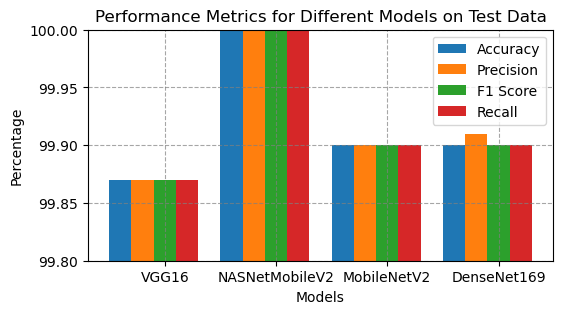

In [53]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['VGG16', 'NASNetMobileV2', 'MobileNetV2', 'DenseNet169']

# Metrics for each model
accuracies = [0.9987, 1.00, 0.9990, 0.9990]
precision = [0.9987, 1.0, 0.9990, 0.9991]
f1score = [0.9987, 1.0, 0.9990, 0.9990]
recall = [0.9987, 1.00, 0.9990, 0.9990]

# Convert accuracies to percentages
accuracies_percentage = [acc * 100 for acc in accuracies]
precision_percentage = [acc * 100 for acc in precision]
f1score_percentage = [acc * 100 for acc in f1score]
recall_percentage = [acc * 100 for acc in recall]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(6, 3))

# Bar width
bar_width = 0.2
index = np.arange(len(model_names))

# Plot bars
bar1 = ax.bar(index - bar_width, accuracies_percentage, bar_width, label='Accuracy')
bar2 = ax.bar(index, precision_percentage, bar_width, label='Precision')
bar3 = ax.bar(index + bar_width, f1score_percentage, bar_width, label='F1 Score')
bar4 = ax.bar(index + 2 * bar_width, recall_percentage, bar_width, label='Recall')

# Set labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Percentage')
ax.set_title('Performance Metrics for Different Models on Test Data')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_names)
ax.legend()

# Set y-axis limits
ax.set_ylim(99.8, 100)

# Add grid lines to the background
ax.grid(True, linestyle='--', alpha=0.7, color='grey')

# Show the plot
plt.show()


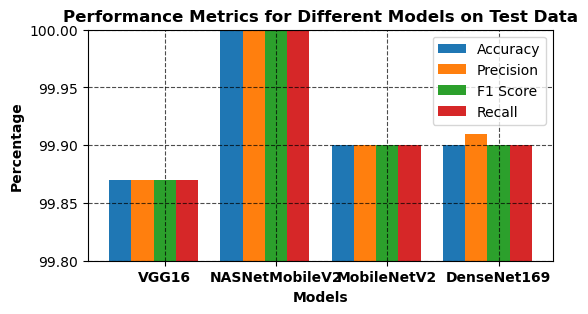

In [54]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['VGG16', 'NASNetMobileV2', 'MobileNetV2', 'DenseNet169']

# Metrics for each model
accuracies = [0.9987, 1.00, 0.9990, 0.9990]
precision = [0.9987, 1.0, 0.9990, 0.9991]
f1score = [0.9987, 1.0, 0.9990, 0.9990]
recall = [0.9987, 1.00, 0.9990, 0.9990]

# Convert accuracies to percentages
accuracies_percentage = [acc * 100 for acc in accuracies]
precision_percentage = [acc * 100 for acc in precision]
f1score_percentage = [acc * 100 for acc in f1score]
recall_percentage = [acc * 100 for acc in recall]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(6, 3))

# Bar width
bar_width = 0.2
index = np.arange(len(model_names))

# Plot bars
bar1 = ax.bar(index - bar_width, accuracies_percentage, bar_width, label='Accuracy')
bar2 = ax.bar(index, precision_percentage, bar_width, label='Precision')
bar3 = ax.bar(index + bar_width, f1score_percentage, bar_width, label='F1 Score')
bar4 = ax.bar(index + 2 * bar_width, recall_percentage, bar_width, label='Recall')

# Set labels, title, and legend with bold and dark black text
ax.set_xlabel('Models', fontweight='bold', color='black')
ax.set_ylabel('Percentage', fontweight='bold', color='black')
ax.set_title('Performance Metrics for Different Models on Test Data', fontweight='bold', color='black')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_names, fontweight='bold', color='black')
ax.legend()

# Set y-axis limits
ax.set_ylim(99.8, 100)

# Add grid lines to the background with bold and dark black lines
ax.grid(True, linestyle='--', alpha=0.7, color='black', linewidth=0.8)

# Show the plot
plt.show()


In [10]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision

# Define mixed precision policy
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_policy(policy)

AttributeError: module 'keras.api._v2.keras.mixed_precision' has no attribute 'set_policy'

In [18]:
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

In [19]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision

In [11]:
pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 88.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 27.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.3:
      Successfully uninstalled tensorboard-2.12.3
  Attempting unin

In [20]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),

      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [21]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 5,verbose = 1,factor = 0.1, min_lr = 1e-6)

mcp = ModelCheckpoint('model.h5')


es = EarlyStopping(verbose=1, patience=20)

In [12]:
num_of_test_samples=3153
batch_size = 128

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

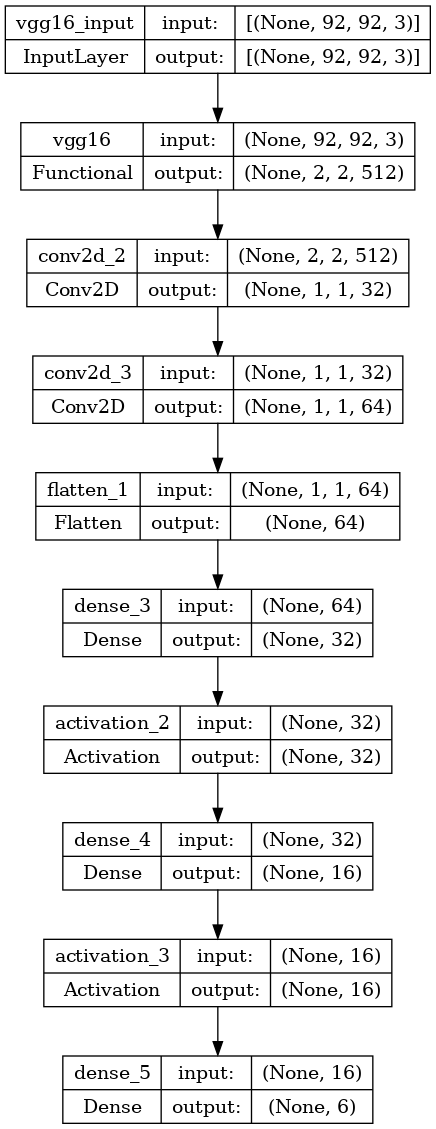

In [13]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.metrics import f1_score



# Load the model from the .h5 file, providing the custom metric function
model = tf.keras.models.load_model('/kaggle/input/ferg-db-with-models/FERG_DB_256/my_model_vgg16_ferg_db.h5', custom_objects={'f1_score': f1_score})

# Visualize the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [27]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.metrics import f1_score


# Load the model from the .h5 file, providing the custom metric function
model0 = tf.keras.models.load_model('/kaggle/input/models/models/my_model_vgg16_ferg_db_comp.h5', custom_objects={'f1_score': f1_score})


In [ ]:
y_test = np.array(test_generator.classes)[test_generator.index_array]

Y_pred = model0.predict(test_generator, num_of_test_samples // batch_size+1,workers=0)
Y_pred = np.argmax(Y_pred, axis=1)

y_test.shape


print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, Y_pred))
print("======================================================================")
print('Classification Report using vgg16')
target_names=['anger','disgust','joy','neutral','sadness','surprise']
print(classification_report(test_generator.classes, Y_pred, target_names=target_names))








labels = ['Anger','Disgust','Joy','Neutral','Sadness','Surprise']


cm = confusion_matrix(y_test, Y_pred)   

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Reds_r)
print('Displaying Confusion Matrix')
print('==========================================================')
plt.title('Confusion Matrix using VGG16')
plt.show()
print('==========================================================')

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, log_loss
import matplotlib.pyplot as plt

# Assuming you have y_test, Y_pred, and y_prob
# y_test is the true labels, Y_pred is the predicted labels, and y_prob is the predicted probabilities

# Calculate precision, recall, F1 score, and accuracy
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')
accuracy = accuracy_score(y_test, Y_pred)

# Calculate log loss
testing_loss = log_loss(y_test, y_prob)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Testing Loss: {testing_loss:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds_r)
plt.title('Confusion Matrix')
plt.show()


NameError: name 'y_test' is not defined

In [ ]:
def calculate_recall(precision, f1_score):
    # Check for division by zero
    if precision + f1_score == 0:
        return 0.0
    else:
        recall = 2 * precision * f1_score / (precision + f1_score)
        return recall

# Example usage:
precision = 0.9991 # Replace with your actual precision value
f1_score = 0.9990  # Replace with your actual F1 score value

recall = calculate_recall(precision, f1_score)
print(f'Recall: {recall:.4f}')


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score
import matplotlib.pyplot as plt

# Assuming you have y_test and Y_pred
# y_test is the true labels, and Y_pred is the predicted labels

# Calculate precision and recall
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds_r)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Assuming you have y_test and Y_pred
# y_test is the true labels, and Y_pred is the predicted labels

# Calculate precision, recall, F1 score, and accuracy
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')
accuracy = accuracy_score(y_test, Y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds_r)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, log_loss
import matplotlib.pyplot as plt

# Assuming you have y_test, Y_pred, and y_prob
# y_test is the true labels, Y_pred is the predicted labels, and y_prob is the predicted probabilities

# Calculate precision, recall, F1 score, and accuracy
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')
accuracy = accuracy_score(y_test, Y_pred)

# Calculate log loss
testing_loss = log_loss(y_test,Y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Testing Loss: {testing_loss:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds_r)
plt.title('Confusion Matrix')
plt.show()


In [22]:
base =DenseNet169(include_top=False, weights='imagenet',input_shape=(92,92,3))

51877672/51877672 [==============================] - 0s 0us/step


 base.summary()

In [ ]:
base.summary()

In [24]:
layers_to_train = ['separable_conv_2_bn_normal_lef5_12','separable_conv_2_bn_normal_right2_12','separable_conv_2_bn_normal_left2_12','separable_conv_2_bn_normal_right1_12','separable_conv_2_bn_normal_left1_12','separable_conv_2_normal_lef5_12','separable_conv_2_normal_right2_12','separable_conv_2_normal_left2_12','separable_conv_2_normal_right1_12','separable_conv_2_normal_left1_12']

for layer in base.layers:
    if any(layer_name in layer.name for layer_name in layers_to_train):
        layer.trainable = True
    else:
        layer.trainable = False


In [28]:
layers_to_train = ['block5_conv3','block5_conv2','block5_conv1']

for layer in base.layers:
    if any(layer_name in layer.name for layer_name in layers_to_train):
        layer.trainable = True
    else:
        layer.trainable = False


In [17]:
layers_to_train = ['batch_normalization_94','batch_normalization_86','block_16_project_BN','batch_normalization_93','batch_normalization_92','batch_normalization_89','batch_normalization_88','conv2d_87']

for layer in base.layers:
    if any(layer_name in layer.name for layer_name in layers_to_train):
        layer.trainable = True
    else:
        layer.trainable = False


In [15]:
layers_to_train = ['Conv_1_bn','Conv_1','batch_normalization_93','batch_normalization_92','block_16_project','block_16_depthwise_BN','block_16_depthwise','block_16_expand_BN','block_16_expand']

for layer in base.layers:
    if any(layer_name in layer.name for layer_name in layers_to_train):
        layer.trainable = True
    else:
        layer.trainable = False


In [37]:


for layer in base.layers:
    layer.trainable = False

In [25]:


model=Sequential()
model.add(base)
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Conv2D(64, (1, 1), activation='relu'))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(32,kernel_initializer='he_uniform'))

model.add(Activation('relu'))
model.add(Dense(16,kernel_initializer='he_uniform'))

model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 2, 2, 1664)        12642880  
                                                                 
 conv2d (Conv2D)             (None, 1, 1, 32)          213024    
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 1, 64)          2112      
                                                                 
 batch_normalization (BatchN  (None, 1, 1, 64)         256       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                        

In [26]:
momentum_value = 0.9
opt = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=momentum_value, nesterov=True)


In [20]:
##momentum_value = 0.9
#nag_gamma = 0.9
#initial_learning_rate = 0.01
#decay_steps = 1000  # Some predefined number of steps
#decay_rate = 0.96   # The rate at which the learning rate will decay
#optimizer = tf.keras.optimizers.SGD(learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
 #   initial_learning_rate,
  #  decay_steps=decay_steps,
   # decay_rate=decay_rate
#), momentum=momentum_value, nesterov=True, nesterov_gamma=nag_gamma)32

In [27]:
from sklearn.utils import compute_class_weight
train_labels = train_dataset.classes
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_labels),
                                        y = train_labels                                                    
                                    )
class_weights = dict(zip(np.unique(train_labels), class_weights))
class_weights



{0: 1.0105241221214962,
 1: 1.1596779336734695,
 2: 1.076757957068838,
 3: 1.0063645797301972,
 4: 1.0024808765763904,
 5: 0.9300258926573538,
 6: 0.8673384211781541}

In [ ]:
import numpy as np

# Extract the true class labels from the train_dataset
train_labels = train_dataset.classes

# Get the unique class labels and their counts
unique_labels, class_counts = np.unique(train_labels, return_counts=True)

# Calculate the total number of samples
total_samples = np.sum(class_counts)

# Calculate class weights as inversely proportional to class frequencies
class_weights = {label: total_samples / (len(unique_labels) * count) for label, count in zip(unique_labels, class_counts)}
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [28]:
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=METRICS)


In [29]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 100,verbose = 1,callbacks=[lrd,mcp],batch_size= 32)



Epoch 1/100
910/910 [==============================] - 224s 228ms/step - loss: 0.7669 - accuracy: 0.9336 - precision: 0.9706 - recall: 0.5517 - auc: 0.9699 - f1_score: 0.6694 - val_loss: 0.4617 - val_accuracy: 0.9689 - val_precision: 0.9821 - val_recall: 0.7971 - val_auc: 0.9892 - val_f1_score: 0.8785 - lr: 1.0000e-04
Epoch 2/100
910/910 [==============================] - 117s 128ms/step - loss: 0.2138 - accuracy: 0.9931 - precision: 0.9984 - recall: 0.9535 - auc: 0.9997 - f1_score: 0.9747 - val_loss: 0.1893 - val_accuracy: 0.9912 - val_precision: 0.9782 - val_recall: 0.9597 - val_auc: 0.9955 - val_f1_score: 0.9687 - lr: 1.0000e-04
Epoch 3/100
910/910 [==============================] - 117s 129ms/step - loss: 0.0914 - accuracy: 0.9987 - precision: 0.9993 - recall: 0.9916 - auc: 0.9999 - f1_score: 0.9954 - val_loss: 0.1115 - val_accuracy: 0.9961 - val_precision: 0.9879 - val_recall: 0.9848 - val_auc: 0.9973 - val_f1_score: 0.9863 - lr: 1.0000e-04
Epoch 4/100
910/910 [===================

In [30]:
model.save('my_model_densenet_ferg_db_comp_large.h5')

In [46]:
import pickle

# Assuming history is already defined and populated

# Define a dictionary to store the history
training_history = {
    'train_acc': history.history['accuracy'],
    'val_acc': history.history['val_accuracy'],
    'train_loss': history.history['loss'],
    'val_loss': history.history['val_loss']
}

# Specify the file path where you want to save the history
file_path = "/kaggle/working/"

# Save the history to a file using pickle
with open(file_path, 'wb') as file:
    pickle.dump(training_history, file)

print("Training history saved successfully.")


IsADirectoryError: [Errno 21] Is a directory: '/kaggle/working/'

In [31]:
import os
import pickle

# Assuming history is already defined and populated

# Define a dictionary to store the history
training_history = {
    'train_acc': history.history['accuracy'],
    'val_acc': history.history['val_accuracy'],
    'train_loss': history.history['loss'],
    'val_loss': history.history['val_loss']
}

# Specify the directory path where you want to save the file
directory_path = "/kaggle/working/"
# Ensure that the directory exists, if not create it
os.makedirs(directory_path, exist_ok=True)

# Specify the file name
file_name = "training_history_mobilenet.pkl"

# Specify the complete file path
file_path = os.path.join(directory_path, file_name)

# Save the history to a file using pickle
with open(file_path, 'wb') as file:
    pickle.dump(training_history, file)

print("Training history saved successfully.")


Training history saved successfully.


In [66]:
import os

# Specify the file path
file_path = "/kaggle/working/training_history.pkl"

# Check if the file exists
if os.path.exists(file_path):
    print("The file exists.")
else:
    print("The file does not exist.")


The file exists.


In [32]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [33]:
test_generator= test_datagen.flow_from_directory(directory = '/kaggle/input/co-ferg-db/FERG_DB_WITH_TEST/test',
                                                  target_size = (92,92),
                                                  class_mode = 'categorical',
                                                   

                                                  batch_size = 128,
                                                  shuffle = False
                                                  )

Found 8078 images belonging to 7 classes.


Found 12621 images belonging to 6 classes.


In [34]:
num_of_test_samples=8078
batch_size = 128

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [35]:
epochs = range(1, len(train_acc) + 1)

64/64 [==============================] - 27s 427ms/step
Confusion Matrix
[[1142    0    0    0    0    0    0]
 [   0  995    0    0    0    0    0]
 [   0    0 1071    0    0    0    0]
 [   0    6    0 1141    0    0    0]
 [   0    0    0    0 1151    0    0]
 [   0    0    0    0    0 1241    0]
 [   0    0    0    0    0    3 1328]]
Classification Report using vgg16
              precision    recall  f1-score   support

       anger       1.00      1.00      1.00      1142
     disgust       0.99      1.00      1.00       995
        fear       1.00      1.00      1.00      1071
         joy       1.00      0.99      1.00      1147
     neutral       1.00      1.00      1.00      1151
     sadness       1.00      1.00      1.00      1241
    surprise       1.00      1.00      1.00      1331

    accuracy                           1.00      8078
   macro avg       1.00      1.00      1.00      8078
weighted avg       1.00      1.00      1.00      8078

Displaying Confusion Matrix


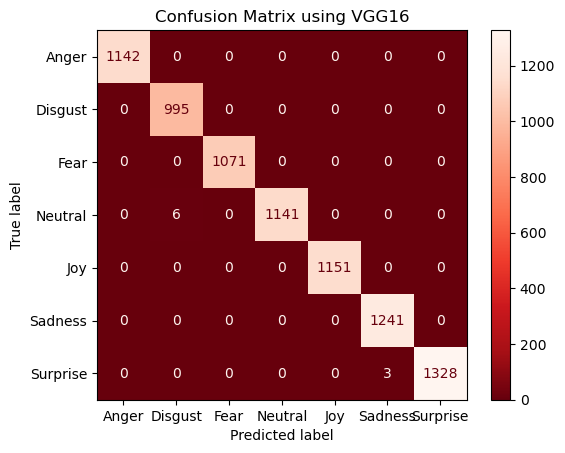

In [37]:
y_test = np.array(test_generator.classes)[test_generator.index_array]

Y_pred = model.predict(test_generator, num_of_test_samples // batch_size+1,workers=0)
Y_pred = np.argmax(Y_pred, axis=1)

y_test.shape


print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, Y_pred))
print("======================================================================")
print('Classification Report using vgg16')
target_names=['anger','disgust','fear','joy','neutral','sadness','surprise']
print(classification_report(test_generator.classes, Y_pred, target_names=target_names))








labels = ['Anger','Disgust','Fear','Neutral','Joy','Sadness','Surprise']


cm = confusion_matrix(y_test, Y_pred)   

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Reds_r)
print('Displaying Confusion Matrix')
print('==========================================================')
plt.title('Confusion Matrix using VGG16')
plt.show()
print('==========================================================')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score
import matplotlib.pyplot as plt

# Assuming you have y_test and Y_pred
# y_test is the true labels, and Y_pred is the predicted labels

# Calculate precision and recall
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds_r)
plt.title('Confusion Matrix')
plt.show()


In [30]:


# Extract the training and validation metrics from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [49]:
import pickle

# Assuming 'history' is your history object containing metrics

# Save the history object
with open('history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


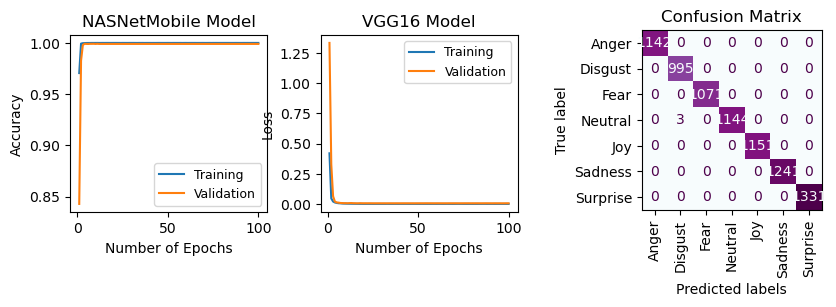

In [30]:


#setting the size of the figures
fig, ax = plt.subplots(1,3,figsize=(18, 3))

#plotting the accuracy
ax[0].plot(epochs, train_acc, label='Training')
ax[0].plot(epochs, val_acc, label='Validation')
ax[0].set_xlabel('Number of Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('NASNetMobile Model')
ax[0].legend()
ax[0].legend(prop={'size': 9})

#plotting the loss
ax[1].plot(epochs, train_loss, label='Training')
ax[1].plot(epochs, val_loss, label='Validation')
ax[1].set_xlabel('Number of Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('VGG16 Model')
ax[1].legend()
ax[1].legend(prop={'size': 9})

# confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax[2],xticks_rotation='vertical',cmap='BuPu')
disp.im_.colorbar.remove()
fig = disp.ax_.get_figure()
fig.set_figwidth(9)
fig.set_figheight(2.3)
ax[2].set_xlabel('Predicted labels')
#ax[2].set_ylabel('True labels')
ax[2].set_title('Confusion Matrix')
plt.subplots_adjust(hspace=0.5, wspace=0.27)
ax1 = ax[1].get_position()
ax2 = ax[2].get_position()
ax[1].set_position([ax1.x0,ax1.y0,ax1.width,ax1.height])
ax[2].set_position([.76,ax2.y0,.2,.8])
plt.show()

64/64 [==============================] - 28s 433ms/step - loss: 0.0076 - accuracy: 0.9997 - precision: 0.9989 - recall: 0.9988 - auc: 0.9998 - f1_score: 0.9988
Test Loss: [0.007576717529445887, 0.9996640086174011, 0.9988857507705688, 0.9987620711326599, 0.9997971653938293, 0.9988386631011963]
F1 Score: 0.9988860199805453
Precision: 0.9988912105425417
Recall: 0.9988858628373359
Confusion Matrix:
[[1142    0    0    0    0    0    0]
 [   0  995    0    0    0    0    0]
 [   0    0 1071    0    0    0    0]
 [   0    6    0 1141    0    0    0]
 [   0    0    0    0 1151    0    0]
 [   0    0    0    0    0 1241    0]
 [   0    0    0    0    0    3 1328]]
Classification Report:
              precision    recall  f1-score   support

       anger       1.00      1.00      1.00      1142
     disgust       0.99      1.00      1.00       995
        fear       1.00      1.00      1.00      1071
         joy       1.00      0.99      1.00      1147
     neutral       1.00      1.00      1.

<Figure size 800x600 with 0 Axes>

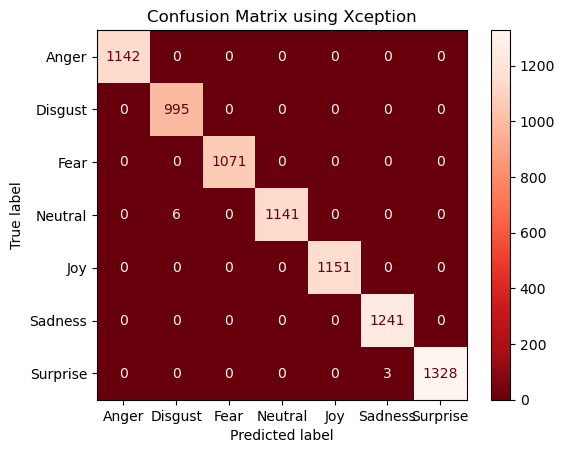

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

# Assuming you have already compiled your model and defined labels and other necessary variables

# Get true labels
y_test = np.array(test_generator.classes)[test_generator.index_array]

# Predict labels
Y_pred = model.predict(test_generator, num_of_test_samples // batch_size + 1, workers=0)
Y_pred = np.argmax(Y_pred, axis=1)

# Calculate test loss
test_loss = model.evaluate(test_generator)
print('Test Loss:', test_loss)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred)

# Calculate additional evaluation metrics
target_names = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
f1 = f1_score(y_test, Y_pred, average='weighted')
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')

# Print metrics
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)

# Print confusion matrix and classification report
print('Confusion Matrix:')
print(conf_matrix)
print('======================================================================')
print('Classification Report:')
print(classification_report(y_test, Y_pred, target_names=target_names))

# Display confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap=plt.cm.Reds_r)
plt.title('Confusion Matrix using Xception')
plt.show()


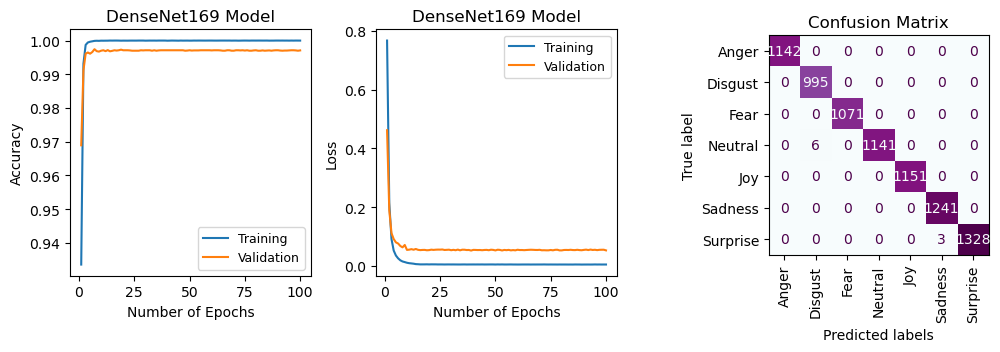

In [38]:
# setting the size of the figures
fig, ax = plt.subplots(1, 3, figsize=(20, 5))  # Adjusted figsize

# plotting the accuracy
ax[0].plot(epochs, train_acc, label='Training')
ax[0].plot(epochs, val_acc, label='Validation')
ax[0].set_xlabel('Number of Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('DenseNet169 Model')
ax[0].legend()
ax[0].legend(prop={'size': 9})

# plotting the loss
ax[1].plot(epochs, train_loss, label='Training')
ax[1].plot(epochs, val_loss, label='Validation')
ax[1].set_xlabel('Number of Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('DenseNet169 Model')
ax[1].legend()
ax[1].legend(prop={'size': 9})

# confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax[2], xticks_rotation='vertical', cmap='BuPu')
disp.im_.colorbar.remove()
fig = disp.ax_.get_figure()
fig.set_figwidth(11)  # Adjusted width
fig.set_figheight(3.2)  # Adjusted height
ax[2].set_xlabel('Predicted labels')
# ax[2].set_ylabel('True labels')
ax[2].set_title('Confusion Matrix')
plt.subplots_adjust(hspace=0.5, wspace=0.27)
ax1 = ax[1].get_position()
ax2 = ax[2].get_position()
ax[1].set_position([ax1.x0, ax1.y0, ax1.width, ax1.height])
ax[2].set_position([.76, ax2.y0, .2, .8])
plt.show()


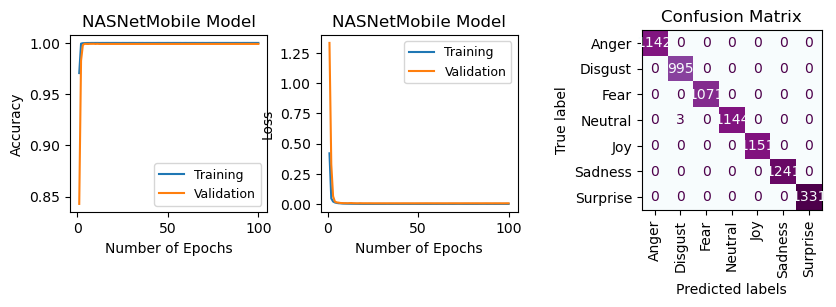

In [33]:

#setting the size of the figures
fig, ax = plt.subplots(1,3,figsize=(18, 3))

#plotting the accuracy
ax[0].plot(epochs, train_acc, label='Training')
ax[0].plot(epochs, val_acc, label='Validation')
ax[0].set_xlabel('Number of Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('NASNetMobile Model')
ax[0].legend()
ax[0].legend(prop={'size': 9})

#plotting the loss
ax[1].plot(epochs, train_loss, label='Training')
ax[1].plot(epochs, val_loss, label='Validation')
ax[1].set_xlabel('Number of Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('NASNetMobile Model')
ax[1].legend()
ax[1].legend(prop={'size': 9})

# confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax[2],xticks_rotation='vertical',cmap='BuPu')
disp.im_.colorbar.remove()
fig = disp.ax_.get_figure()
fig.set_figwidth(9)
fig.set_figheight(2.3)
ax[2].set_xlabel('Predicted labels')
#ax[2].set_ylabel('True labels')
ax[2].set_title('Confusion Matrix')
plt.subplots_adjust(hspace=0.5, wspace=0.27)
ax1 = ax[1].get_position()
ax2 = ax[2].get_position()
ax[1].set_position([ax1.x0,ax1.y0,ax1.width,ax1.height])
ax[2].set_position([.76,ax2.y0,.2,.8])
plt.show()   

In [34]:
import numpy as np
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow.keras.metrics import CategoricalAccuracy

# Assuming you have trained your model and have the training and validation data ready
y_test_val = np.array(valid_dataset.classes)[valid_dataset.index_array]

Y_pred_val = model.predict(valid_dataset, num_of_test_samples // batch_size+1,workers=0)
Y_pred_val = np.argmax(Y_pred_val, axis=1)

# Get the final training metrics
final_train_loss = history.history['loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]


# Get the final validation metrics
final_val_loss = history.history['val_loss'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]


# Assuming your model is a classification model
# Predict on the validation data to compute F1 score


final_val_f1_score = f1_score(y_test_val, Y_pred_val, average='weighted')

print("Final Training Metrics:")
print(f"Accuracy: {final_train_accuracy:.4f}")
print(f"Loss: {final_train_loss:.4f}")

print("\nFinal Validation Metrics:")
print(f"Accuracy: {final_val_accuracy:.4f}")
print(f"Loss: {final_val_loss:.4f}")

print(f"F1 Score: {final_val_f1_score:.4f}")


101/101 [==============================] - 15s 153ms/step
Final Training Metrics:
Accuracy: 1.0000
Loss: 0.0013

Final Validation Metrics:
Accuracy: 0.9990
Loss: 0.0065
F1 Score: 0.9966


In [35]:
# Evaluate the model on the test dataset to get the test loss
test_loss = model.evaluate(test_generator)

# Assuming your model is a classification model
# Predict on the test data to compute F1 score
y_test = np.array(test_generator.classes)[test_generator.index_array]
Y_pred_test = model.predict(test_generator)
Y_pred_test = np.argmax(Y_pred_test, axis=1)

# Calculate F1 score for the test data
test_f1_score = f1_score(y_test, Y_pred_test, average='weighted')

print("\nTest Metrics:")
print(f"Loss: {test_loss:.4f}")
print(f"F1 Score: {test_f1_score:.4f}")


64/64 [==============================] - 27s 423ms/step

Test Metrics:


TypeError: unsupported format string passed to list.__format__

In [ ]:
base2 =MobileNetV2(include_top=False, weights='imagenet',input_shape=(92,92,3))

In [ ]:
base2.summary()

In [ ]:
layers_to_train = ['Conv_1_bn','Conv_1','block_16_project_BN','block_16_project','block_16_depthwise_BN','block_16_depthwise','block_16_expand_BN','block_16_expand']

for layer in base.layers:
    if any(layer_name in layer.name for layer_name in layers_to_train):
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:


model=Sequential()
model.add(base2)
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Conv2D(64, (1, 1), activation='relu'))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(32,kernel_initializer='he_uniform'))

model.add(Activation('relu'))
model.add(Dense(16,kernel_initializer='he_uniform'))

model.add(Activation('relu'))
model.add(Dense(6,activation='softmax'))
model.summary()

In [ ]:
momentum_value = 0.9
opt = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=momentum_value, nesterov=True)


In [ ]:
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=METRICS)


In [ ]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 100,class_weight= class_weights,verbose = 1,callbacks=[lrd,mcp],batch_size= 128)



In [ ]:
test_generator= test_datagen.flow_from_directory(directory = '/kaggle/input/ferg-with-test/FERG_DB_256/test',
                                                  target_size = (92,92),
                                                  class_mode = 'categorical',
                                                   

                                                  batch_size = 128,
                                                  shuffle = False
                                                  )

In [ ]:
model.save('/kaggle/working/my_model_mobilenetv2.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.metrics import f1_score



# Load the model from the .h5 file, providing the custom metric function
model = tf.keras.models.load_model('/kaggle/working/my_model_mobilenetv2.h5', custom_objects={'f1_score': f1_score})

# Visualize the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
num_of_test_samples=3153
batch_size = 128

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
epochs = range(1, len(train_acc) + 1)

In [ ]:
y_test = np.array(test_generator.classes)[test_generator.index_array]

Y_pred = model.predict(test_generator, num_of_test_samples // batch_size+1,workers=0)
Y_pred = np.argmax(Y_pred, axis=1)

y_test.shape


print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, Y_pred))
print("======================================================================")
print('Classification Report using MobileNetv2')
target_names=['anger','disgust','joy','neutral','sadness','surprise']
print(classification_report(test_generator.classes, Y_pred, target_names=target_names))








labels = ['Anger','Disgust','Joy','Neutral','Sadness','Surprise']


cm = confusion_matrix(y_test, Y_pred)   

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Reds_r)
print('Displaying Confusion Matrix')
print('==========================================================')
plt.title('Confusion Matrix using MobileNetv2')
plt.show()
print('==========================================================')

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ... (Your existing code for model prediction and confusion matrix display)
y_test = np.array(test_generator.classes)[test_generator.index_array]

Y_pred = model.predict(test_generator, num_of_test_samples // batch_size+1,workers=0)
Y_pred = np.argmax(Y_pred, axis=1)

y_test.shape


print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, Y_pred))
print("======================================================================")
print('Classification Report using MobileNetv2')
target_names=['anger','disgust','joy','neutral','sadness','surprise']
print(classification_report(test_generator.classes, Y_pred, target_names=target_names))








labels = ['Anger','Disgust','Joy','Neutral','Sadness','Surprise']


cm = confusion_matrix(y_test, Y_pred)   

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Reds_r)
print('Displaying Confusion Matrix')
print('==========================================================')
plt.title('Confusion Matrix using mobilenetv2')
plt.show()
print('==========================================================')

# Print the precision and recall for each class
report = classification_report(test_generator.classes, Y_pred, target_names=target_names)

print('Classification Report:')
print(report)

# Extract precision and recall values from the report
precision_recall_lines = report.split('\n')[2:-5]  # Extract lines containing precision and recall
precision_recall_values = [line.split() for line in precision_recall_lines if line.strip()]  # Split lines into values

# Create dictionaries to store precision and recall values for each class
precision_dict = {}
recall_dict = {}

# Extract and print precision and recall for each class
for values in precision_recall_values:
    class_name = values[0]
    precision = float(values[1])
    recall = float(values[2])

    precision_dict[class_name] = precision
    recall_dict[class_name] = recall

    print(f'{class_name}: Precision = {precision:.4f}, Recall = {recall:.4f}')

# Display confusion matrix
labels = ['Anger','Disgust','Joy','Neutral','Sadness','Surprise']
cm = confusion_matrix(y_test, Y_pred)   
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Reds_r)
print('Displaying Confusion Matrix')
plt.title('Confusion Matrix using MobileNetV2')
plt.show()


In [ ]:


#setting the size of the figures
fig, ax = plt.subplots(1,3,figsize=(18, 3))

#plotting the accuracy
ax[0].plot(epochs, train_acc, label='Training')
ax[0].plot(epochs, val_acc, label='Validation')
ax[0].set_xlabel('Number of Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('MobileNetV2 Model')
ax[0].legend()
ax[0].legend(prop={'size': 9})

#plotting the loss
ax[1].plot(epochs, train_loss, label='Training')
ax[1].plot(epochs, val_loss, label='Validation')
ax[1].set_xlabel('Number of Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('MobileNetV2 Model')
ax[1].legend()
ax[1].legend(prop={'size': 9})

# confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax[2],xticks_rotation='vertical',cmap='BuPu')
disp.im_.colorbar.remove()
fig = disp.ax_.get_figure()
fig.set_figwidth(9)
fig.set_figheight(2.3)
ax[2].set_xlabel('Predicted labels')
#ax[2].set_ylabel('True labels')
ax[2].set_title('Confusion Matrix')
plt.subplots_adjust(hspace=0.5, wspace=0.27)
ax1 = ax[1].get_position()
ax2 = ax[2].get_position()
ax[1].set_position([ax1.x0,ax1.y0,ax1.width,ax1.height])
ax[2].set_position([.76,ax2.y0,.2,.8])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score
import matplotlib.pyplot as plt

# Assuming you have y_test and Y_pred
# y_test is the true labels, and Y_pred is the predicted labels

# Calculate precision and recall
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds_r)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
base3 =DenseNet169(include_top=False, weights='imagenet',input_shape=(92,92,3))

In [ ]:
base3.summary()

In [ ]:
layers_to_train = ['bn','Conv_1','conv5_block32_2_conv','conv5_block32_1_bn','conv5_block32_1_conv','conv5_block32_0_bn','conv5_block31_2_conv','conv5_block31_1_bn','conv5_block31_1_conv','conv5_block31_0_bn']

for layer in base.layers:
    if any(layer_name in layer.name for layer_name in layers_to_train):
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:
base3.summary()

In [ ]:


model=Sequential()
model.add(base3)
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Conv2D(64, (1, 1), activation='relu'))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(32,kernel_initializer='he_uniform'))

model.add(Activation('relu'))
model.add(Dense(16,kernel_initializer='he_uniform'))

model.add(Activation('relu'))
model.add(Dense(6,activation='softmax'))
model.summary()

In [ ]:
momentum_value = 0.9
opt = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=momentum_value, nesterov=True)


In [ ]:
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=METRICS)


In [ ]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 100,class_weight= class_weights,verbose = 1,callbacks=[lrd,mcp],batch_size= 128)



In [ ]:
test_generator= test_datagen.flow_from_directory(directory = '/kaggle/input/ferg-with-test/FERG_DB_256/test',
                                                  target_size = (92,92),
                                                  class_mode = 'categorical',
                                                   

                                                  batch_size = 128,
                                                  shuffle = False
                                                  )

In [ ]:
model.save('/kaggle/working/my_model_densenet169.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.metrics import f1_score



# Load the model from the .h5 file, providing the custom metric function
model = tf.keras.models.load_model('/kaggle/working/my_model_densenet169.h5', custom_objects={'f1_score': f1_score})

# Visualize the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
num_of_test_samples=3153
batch_size = 128

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
epochs = range(1, len(train_acc) + 1)

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
y_test = np.array(test_generator.classes)[test_generator.index_array]

Y_pred = model.predict(test_generator, num_of_test_samples // batch_size+1,workers=0)
Y_pred = np.argmax(Y_pred, axis=1)

y_test.shape


print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, Y_pred))
print("======================================================================")
print('Classification Report using MobileNetv2')
target_names=['anger','disgust','joy','neutral','sadness','surprise']
print(classification_report(test_generator.classes, Y_pred, target_names=target_names))








labels = ['Anger','Disgust','Joy','Neutral','Sadness','Surprise']


cm = confusion_matrix(y_test, Y_pred)   

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Reds_r)
print('Displaying Confusion Matrix')
print('==========================================================')
plt.title('Confusion Matrix using MobileNetv2')
plt.show()
print('==========================================================')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score
import matplotlib.pyplot as plt

# Assuming you have y_test and Y_pred
# y_test is the true labels, and Y_pred is the predicted labels

# Calculate precision and recall
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds_r)
plt.title('Confusion Matrix')
plt.show()


In [ ]:


#setting the size of the figures
fig, ax = plt.subplots(1,3,figsize=(18, 3))

#plotting the accuracy
ax[0].plot(epochs, train_acc, label='Training')
ax[0].plot(epochs, val_acc, label='Validation')
ax[0].set_xlabel('Number of Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('MobileNetV2 Model')
ax[0].legend()
ax[0].legend(prop={'size': 9})

#plotting the loss
ax[1].plot(epochs, train_loss, label='Training')
ax[1].plot(epochs, val_loss, label='Validation')
ax[1].set_xlabel('Number of Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('MobileNetV2 Model')
ax[1].legend()
ax[1].legend(prop={'size': 9})

# confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax[2],xticks_rotation='vertical',cmap='BuPu')
disp.im_.colorbar.remove()
fig = disp.ax_.get_figure()
fig.set_figwidth(9)
fig.set_figheight(2.3)
ax[2].set_xlabel('Predicted labels')
#ax[2].set_ylabel('True labels')
ax[2].set_title('Confusion Matrix')
plt.subplots_adjust(hspace=0.5, wspace=0.27)
ax1 = ax[1].get_position()
ax2 = ax[2].get_position()
ax[1].set_position([ax1.x0,ax1.y0,ax1.width,ax1.height])
ax[2].set_position([.76,ax2.y0,.2,.8])
plt.show()

VISION transformer


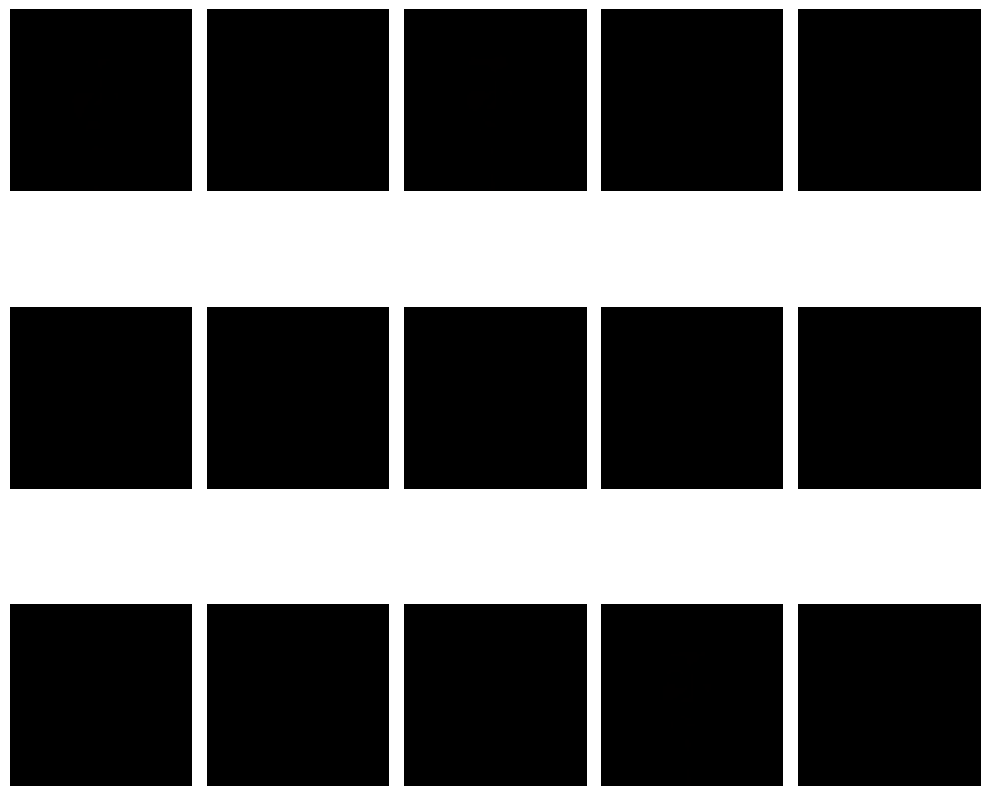

In [13]:

images = [train_dataset[0][0][i] for i in range(16)]
fig, axes = plt.subplots(3, 5, figsize = (10, 10))

axes = axes.flatten()

for img, ax in zip(images, axes):
    ax.imshow(img.reshape(92, 92, 3).astype("uint8"))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [6]:
!pip install vit_keras

In [9]:
from vit_keras import vit

vit_model = vit.vit_b16(
        image_size = (92,92),
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 5)

AssertionError: image_size must be a multiple of patch_size

In [5]:
class Patches(L.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images = images,
            sizes = [1, self.patch_size, self.patch_size, 1],
            strides = [1, self.patch_size, self.patch_size, 1],
            rates = [1, 1, 1, 1],
            padding = 'VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

NameError: name 'L' is not defined

In [ ]:
plt.figure(figsize=(4, 4))
batch_size = 16
patch_size = 7  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2

x = train_gen.next()
image = x[0][0]

plt.imshow(image.astype('uint8'))
plt.axis('off')

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size = (image_size, image_size)
)

patches = Patches(patch_size)(resized_image)
print(f'Image size: {image_size} X {image_size}')
print(f'Patch size: {patch_size} X {patch_size}')
print(f'Patches per image: {patches.shape[1]}')
print(f'Elements per patch: {patches.shape[-1]}')

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))

for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype('uint8'))
    plt.axis('off')

In [ ]:
model = tf.keras.Sequential([
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation = tfa.activations.gelu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation = tfa.activations.gelu),
        tf.keras.layers.Dense(32, activation = tfa.activations.gelu),
        tf.keras.layers.Dense(3, 'softmax')
    ],
    name = 'vision_transformer')

model.summary()